# Тестовое задание Data Analyst | Задание 4

* Тестовое задание состоит из нескольких задач, которые необходимо реализовать на языке Python.
* Допускается применение дополнительных пакетов, будет плюсом распараллелить задачи для ускорения выполнения там где это требуется.
* Все тестовые датасеты загружаем и процессим (делаем выборки, джойны, фильтруем и т.д.) в коде.
* Если у вас не получилось сделать какие-то шаги, но вы понимаете все остальное - пропускайте их и делайте то  в чем разбираетесь.
* Результат выполнения - ссылка на github с jupiter notebook. Высылаем все ответы / ссылки на fediaeva@skytecgames.com. Так же напишите сколько часов у вас ушло на выполнение.
* При возникновении вопросов по тестовому заданию - пишем туда же, на  fediaeva@skytecgames.com
* Необходимо сделать минимум 3 задания на ваш выбор. Чем больше заданий сделали, тем лучше.
* Тестовый датасет прилагается к письму sqlite файлом `testcase.db.zip`

---

## 4 Эффективность рекламных кампаний

Отдел маркетинга оперирует некоторым множеством рекламных кампаний. Первая часть оперирования состоит из запуска тестовых рекламных кампаний, у которых есть требования по KPI при достижении которых тест считается успешным.

Успешные тесты переходят в разряд постоянных кампаний и вторая часть оперирования состоит из мониторинга постоянных кампаний - управление бюджетом кампании (COST) и мониторинг ее доходов (REVENUE), а так же соотношением доходов к расходам.

Главный KPI для постоянных рекламных кампаний - ROAS на 60й день, т.е. какой процент от расходов кампания возвращает на 60й день.
Для выполнения задачи необходимо использовать тестовый датасет (2 таблицы по расходам и доходам).

1.	Отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня). На основании данных подтвердите или опровергните эту гипотезу. Исходите из того что мы точно знаем что CPI зависит от объема нелинейно, вопрос в том как эту зависимость описать и учесть во 2м вопросе.
2.	По каждой рекламной кампании рассчитайте суточный рекламный бюджет который максимизирует абсолютную маркетинговую прибыль рекламной кампании (REVENUE 60 дня минус COST).
3.	Исходя из пункта 2 по каждой рекламной кампании дайте ваше заключение о том насколько нужно увеличить / уменьшить ее суточный бюджет либо вообще остановить.
4.	Решите проблему рекламных кампаний по которым еще нет полных 60 дней. Объясните почему ваше решение оптимально

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import pearsonr

Загрузим наборы данных:

In [2]:
# reading data
data_costs = pd.read_csv('costs.txt')
data_revenue = pd.read_csv('revenue.txt')

display(data_costs.head())
print('data_costs shape:', data_costs.shape)
display(data_revenue.head())
print('data_revenue shape:', data_revenue.shape)

,Install_Dates,campaign_id,Country,installs,spends
0,2020-04-14,90570,CZ,35.0,19.79
1,2020-04-28,90619,AT,5.0,4.99
2,2020-05-10,794235,PK,79.0,0.40
3,2020-05-07,91872,FR,12.0,9.56
4,2020-04-03,19115,JP,6.0,3.39


data_costs shape: (9934, 5)


,Install_Dates,campaign_id,Country,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV
0,2020-04-14,90570,CZ,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420
1,2020-03-30,90262,CA,1.424363,1.724738,1.724738,1.724738,1.724738,1.999413
2,2020-04-02,19115,PL,26.912006,32.943050,66.787497,70.071922,71.644023,72.057026
3,2020-04-15,788948,MD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-03-26,158583,DE,0.349793,0.349793,0.349793,0.349793,0.349793,0.349793


data_revenue shape: (9934, 9)


Выведем информацию о наборах данных:

In [3]:
print('data_costs:\n')
print(data_costs.info())
print('\ndata_revenue:\n')
print(data_revenue.info())

data_costs:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9934 entries, 0 to 9933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Install_Dates  9934 non-null   object 
 1   campaign_id    9934 non-null   int64  
 2   Country        9928 non-null   object 
 3   installs       9934 non-null   float64
 4   spends         9934 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 388.2+ KB
None

data_revenue:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9934 entries, 0 to 9933
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Install_Dates  9934 non-null   object 
 1   campaign_id    9934 non-null   int64  
 2   Country        9928 non-null   object 
 3   1d_LTV         9934 non-null   float64
 4   3d_LTV         9934 non-null   float64
 5   7d_LTV         9934 non-null   float64
 6   14d_LTV        9934 non-n

Объединим наборы данных во временной ряд:

In [4]:
def create_series(data: pd.DataFrame) -> pd.DataFrame:
    '''Editing column names, types, dropping columns, sorting and setting index to time series

        Args:
        - data (pd.DataFrame) - initial data

        Returns:
        - pd.DataFrame - edited dataframe
    '''
    data_series = data.copy()
    data_series.columns = [col.lower() for col in data_series.columns]
    data_series['install_dates'] = pd.to_datetime(data_series['install_dates'])
    data_series = data_series.drop('country', axis=1)
    data_series = data_series.groupby(['install_dates', 'campaign_id'])[data_series.columns[2:]].sum()
    data_series = data_series.sort_index()

    return data_series


# turning data into series and joining
data_series = create_series(data_costs).join(create_series(data_revenue), how='outer')
data_series = data_series.reset_index(1)

# checking results
display(data_series.head())
print('data_series shape:', data_series.shape)

,campaign_id,installs,spends,1d_ltv,3d_ltv,7d_ltv,14d_ltv,30d_ltv,60d_ltv
install_dates,,,,,,,,,
2020-03-18,19115,2194.0,609.03,464.984093,533.699337,686.510131,870.823061,1039.747595,1240.197616
2020-03-18,22083,0.0,1.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-18,90133,22.0,0.23,0.351389,0.351389,0.374189,0.383966,0.414290,0.416074
2020-03-18,90262,13.0,0.82,1.088200,1.171887,1.181086,1.181086,1.206506,1.206506
2020-03-18,90430,6.0,0.49,0.772965,0.933602,1.025108,1.366333,1.387652,1.387652


data_series shape: (5177, 9)


Изучим данные:

In [5]:
# displaying data info
display(data_series.info())

# displaying data description
print('\ndata_series description:')
display(data_series.describe().T)

# displaying number of NaN values in each column
print('\nTotal NaNs:')
display(data_series.isna().sum())

# printing total number of duplicated values
print('\nTotal duplicates:', data_series.reset_index().duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5177 entries, 2020-03-18 to 2020-05-18
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   campaign_id  5177 non-null   int64  
 1   installs     5177 non-null   float64
 2   spends       5177 non-null   float64
 3   1d_ltv       5177 non-null   float64
 4   3d_ltv       5177 non-null   float64
 5   7d_ltv       5177 non-null   float64
 6   14d_ltv      5177 non-null   float64
 7   30d_ltv      5177 non-null   float64
 8   60d_ltv      5177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 404.5 KB


None


data_series description:


,count,mean,std,min,25%,50%,75%,max
campaign_id,5177.0,482825.378404,343043.537055,19115.0000,93806.000000,786843.000000,789436.000000,804309.000000
installs,5177.0,128.430751,371.710413,0.0000,4.000000,20.000000,83.000000,5303.000000
spends,5177.0,31.751252,82.595292,0.0042,0.760000,7.200000,30.090000,1221.640000
1d_ltv,5177.0,16.443177,45.564339,0.0000,0.202836,2.510839,14.174296,619.681924
3d_ltv,5177.0,18.653024,51.925984,0.0000,0.217446,2.858336,15.850505,695.833265
7d_ltv,5177.0,24.349689,68.199164,0.0000,0.264339,3.710032,21.572042,912.239682
14d_ltv,5177.0,29.282258,82.101369,0.0000,0.301196,4.504567,26.209223,1094.771920
30d_ltv,5177.0,34.101835,95.650928,0.0000,0.359840,5.164248,30.677217,1283.870610
60d_ltv,5177.0,18.858365,86.341336,-104.0000,-1.000000,0.016518,6.816276,1487.377088



Total NaNs:


campaign_id    0
installs       0
spends         0
1d_ltv         0
3d_ltv         0
7d_ltv         0
14d_ltv        0
30d_ltv        0
60d_ltv        0
dtype: int64


Total duplicates: 0


Выведем графики распределения данных:

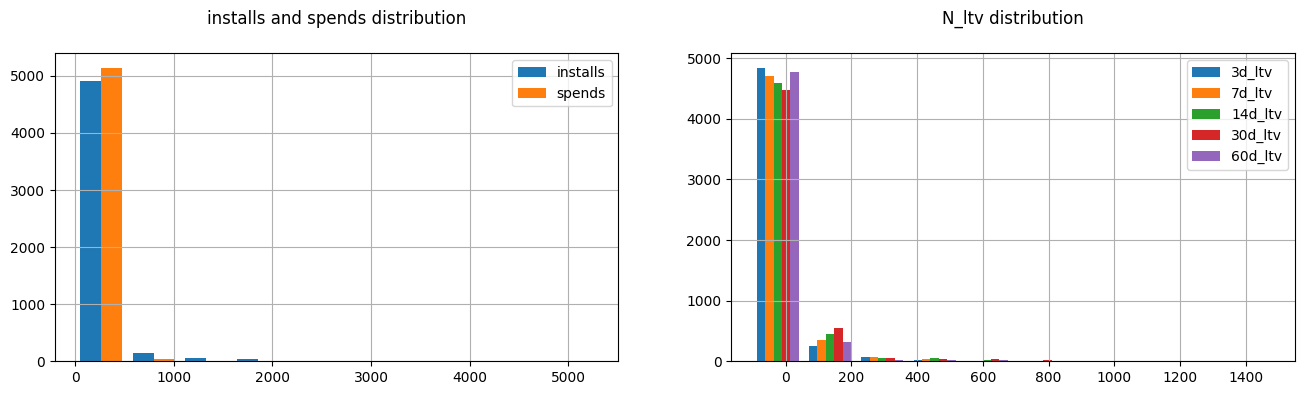

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title(' and '.join(list(data_series.columns[1:3])) + ' distribution\n')
plt.hist(data_series[data_series.columns[1:3]], label=data_series.columns[1:3])
plt.legend()
plt.grid()

plt.subplot(122)
plt.title('N_ltv distribution\n')
plt.hist(data_series[data_series.columns[4:]], label=data_series.columns[4:])
plt.legend()
plt.grid()

plt.show()

<br>

### 4.1	Отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня). На основании данных подтвердите или опровергните эту гипотезу. Исходите из того, что мы точно знаем что CPI зависит от объема нелинейно, вопрос в том, как эту зависимость описать и учесть во 2м вопросе

Гипотезы:
* Нулевая ($ H_0 $) - Больший расход COST на кампанию не уменьшает ROAS 60го дня
* Альтернативная ($ H_1 $) - Больший расход COST на кампанию уменьшает ROAS 60го дня

Рассчитаем ROAS 60го дня:

In [7]:
# calculating CPI (Cost / Installs), COST, Revenue 60 and ROAS (Revenue / Cost)
data_series['cpi'] = data_series.apply(lambda x: x['spends'] / x['installs'] if x['installs'] > 0.0 else 0.0, axis=1)
data_series['roas_60'] = data_series.apply(lambda x: x['60d_ltv'] / x['spends'] if x['spends'] != 0.0 else 0.0, axis=1)
data_series['roas_60_status'] = data_series['roas_60'].apply(lambda x: 'good' if x >= 1 else 'not good')

# checking data
display(data_series.head())
data_series['roas_60_status'].value_counts()

,campaign_id,installs,spends,1d_ltv,3d_ltv,7d_ltv,14d_ltv,30d_ltv,60d_ltv,cpi,roas_60,roas_60_status
install_dates,,,,,,,,,,,,
2020-03-18,19115,2194.0,609.03,464.984093,533.699337,686.510131,870.823061,1039.747595,1240.197616,0.277589,2.036349,good
2020-03-18,22083,0.0,1.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,not good
2020-03-18,90133,22.0,0.23,0.351389,0.351389,0.374189,0.383966,0.414290,0.416074,0.010455,1.809017,good
2020-03-18,90262,13.0,0.82,1.088200,1.171887,1.181086,1.181086,1.206506,1.206506,0.063077,1.471349,good
2020-03-18,90430,6.0,0.49,0.772965,0.933602,1.025108,1.366333,1.387652,1.387652,0.081667,2.831943,good


roas_60_status
not good    3723
good        1454
Name: count, dtype: int64

Проведём корреляционное тестирование:

In [8]:
# calculating correlation
corr, p_value = pearsonr(data_series['spends'], data_series['roas_60'])

print('Correlation:', round(corr, 5))
print('p-value:', round(p_value, 5))


Correlation: 0.02399
p-value: 0.08433


><br>
><b>Вывод</b>
>
>Между COST и ROAS 60го дня слабая корреляция. Нулевая гипотеза подтвердилась - больший расход COST на кампанию не уменьшает ROAS 60го дня.
><br><br>

<br>

### 4.2	По каждой рекламной кампании рассчитайте суточный рекламный бюджет, который максимизирует абсолютную маркетинговую прибыль рекламной кампании (REVENUE 60 дня минус COST)

Рассчитаем прибыль рекламных компаний:

In [9]:
# calculating campaign profit (Revenue - Cost)
data_series['budget'] = data_series.apply(lambda x: (x['60d_ltv'] - x['spends']) / x['installs'] if x['installs'] > 0.0 else 0.0, axis=1)

# checking results
display(data_series.head())
pd.Series(data_series['budget'] < 0).value_counts()

,campaign_id,installs,spends,1d_ltv,3d_ltv,7d_ltv,14d_ltv,30d_ltv,60d_ltv,cpi,roas_60,roas_60_status,budget
install_dates,,,,,,,,,,,,,
2020-03-18,19115,2194.0,609.03,464.984093,533.699337,686.510131,870.823061,1039.747595,1240.197616,0.277589,2.036349,good,0.287679
2020-03-18,22083,0.0,1.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,not good,0.000000
2020-03-18,90133,22.0,0.23,0.351389,0.351389,0.374189,0.383966,0.414290,0.416074,0.010455,1.809017,good,0.008458
2020-03-18,90262,13.0,0.82,1.088200,1.171887,1.181086,1.181086,1.206506,1.206506,0.063077,1.471349,good,0.029731
2020-03-18,90430,6.0,0.49,0.772965,0.933602,1.025108,1.366333,1.387652,1.387652,0.081667,2.831943,good,0.149609


budget
True     3457
False    1720
Name: count, dtype: int64

<br>

### 4.3	Исходя из пункта 2 по каждой рекламной кампании, дайте ваше заключение о том насколько нужно увеличить / уменьшить ее суточный бюджет, либо вообще остановить

\-

<br>

### 4.4	Решите проблему рекламных кампаний, по которым еще нет полных 60 дней. Объясните почему ваше решение оптимально

\-